In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as spat

Load the point data (hand annotated)

In [15]:
pointdat=np.load("./data/raw/Pointdat-184.npy",allow_pickle=True)

Empirically select a good frame. Here: 1484

(0, 190)

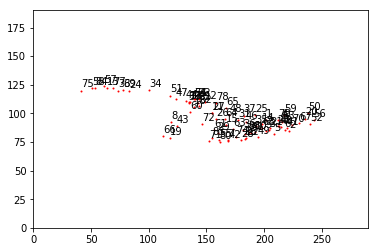

In [18]:
n=1484
plt.scatter(*pointdat[n][:,:2].T,s=1,c="r")
for i,lab in enumerate(pointdat[n][:,3]):
    plt.annotate(int(lab),(pointdat[n][i,:2]+np.array([0,3])))
plt.xlim(0,290)
plt.ylim(0,190)

Draw a centerline by hand and make a nearest neighbor search tree

In [22]:
spinepointsT=np.array([np.linspace(42,250,1005),np.concatenate((np.linspace(103,104,100),np.linspace(104,83,550),np.linspace(83,97,355)))])
spinepoints=spinepointsT.T
tree=spat.cKDTree(spinepoints)

Define a function to get the nearest neighbor of all points

In [23]:
def get_adj(dat,tree):
    adj=[]
    ds=[]
    for i in dat:
        a=tree.query(i,k=1)
        ds.append(a[0])
        adj.append(tree.data[a[1]])
    return adj,ds

In [24]:
adj,ds=get_adj(pointdat[1484][:,:2],tree)

(0, 190)

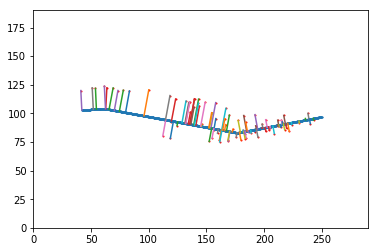

In [25]:
plt.scatter(*pointdat[1484][:,:2].T,s=1,c="r")
plt.scatter(np.linspace(42,250,1005),np.concatenate((np.linspace(103,104,100),np.linspace(104,83,550),np.linspace(83,97,355))),s=1)
for pt1,pt2 in zip(pointdat[1484][:,:2],adj):
    plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlim(0,290)
plt.ylim(0,190)

Now we straighten these

In [30]:
newpoints=[]
for i in range(len(pointdat[1484][:,:2])):
    if pointdat[1484][i,1]<adj[i][1]:#for under the line
        newpoints.append([adj[i][0],-ds[i],pointdat[1484][i,3]])#save the labels as well
        continue
    newpoints.append([adj[i][0],ds[i],pointdat[1484][i,3]])
newpoints=np.array(newpoints)

(-95, 95)

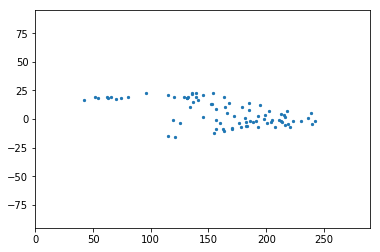

In [31]:
plt.scatter(*newpoints[:,:2].T,s=5)
plt.xlim(0,290)
plt.ylim(-95,95)

Check the shape, the three dimension is for x,y, label. The straightening is in 2D here

In [33]:
newpoints.shape

(84, 3)

Save it

In [ ]:
#np.save("./pythondata/ground.npy",newpoints)